ACTIVIDAD 1

Crear un conjunto de al menos 8 datos de dimensión 2 en los que se vean 2 grupos.

Graficar los datos en un plano bidimensional.

Implementar el algoritmo k-means para descubrir los 2 clusters (D=2, K=2).

Almacenar los centros de cluster en una matriz (¿de qué dimensiones?) y ofrecer como resultado también a qué cluster pertenece cada dato en otra matriz (¿de qué dimensiones?).

Graficar los datos con colores diferentes para cada cluster.

Pensar cómo generalizaría (qué tendría que variar en la implementación) para considerar más dimensiones D en los datos y más clusters K.

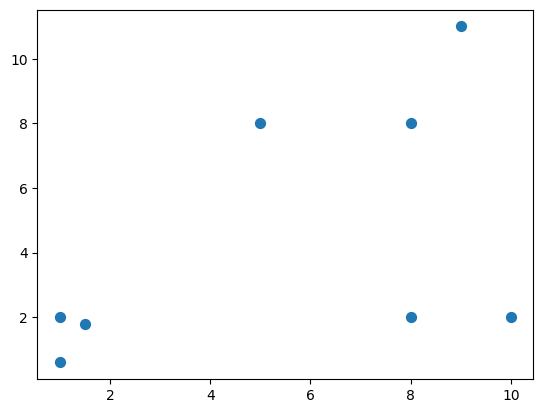

Centroides (dimensiones: 2x2):
[[8.         6.2       ]
 [1.16666667 1.46666667]]

Asignaciones de cluster (dimensiones: 8x1):
[1 1 0 0 1 0 0 0]


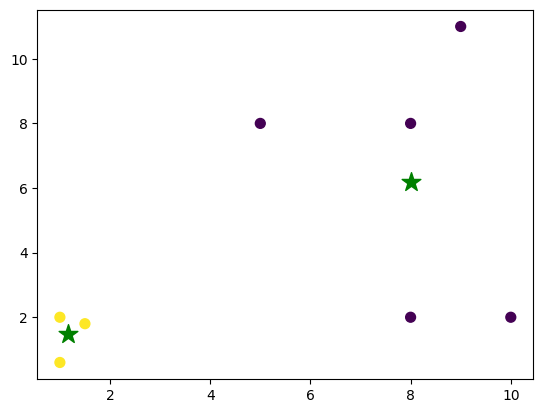

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

conjDatos=np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11],[8,2],[10,2]]) #crear un conjunto de al menos 8 datos de dimension 2 en los que se vean 2 grupos

plt.scatter(conjDatos[:,0], conjDatos[:,1], s=50) #graficar los datos en un plano bidimensional
plt.show()

def k_means(conjDatos, K): #implementar el algoritmo k-means para descubrir los 2 clusters (D=2, K=2)
  centroides=conjDatos[np.random.choice(conjDatos.shape[0], K, replace=False)] #Inicializo los centros de cluster
  asignaciones=np.zeros(conjDatos.shape[0], dtype=int) #Asigno cada punto al cluster mas cercano

  #Itero hasta que todos los datos esten asignados a su cluster mas cercano
  cambio = True
  while cambio:
    cambio = False
    for i in range(conjDatos.shape[0]):
      distancias = np.linalg.norm(conjDatos[i] - centroides, axis=1)
      nueva_asignacion = np.argmin(distancias)
      if nueva_asignacion != asignaciones[i]:
        cambio = True
      asignaciones[i] = nueva_asignacion

    # Actualizar los centros de cluster
    for k in range(K):
      centroides[k] = np.mean(conjDatos[asignaciones == k], axis=0)

  return centroides, asignaciones


# Obtener los clusters
centroides, asignaciones = k_means(conjDatos, 2)

# Imprimir los resultados
print("Centroides (dimensiones: 2x2):")
print(centroides)
print("\nAsignaciones de cluster (dimensiones: 8x1):")
print(asignaciones)

# Graficar los datos con los clusters
plt.scatter(conjDatos[:,0], conjDatos[:,1], c=asignaciones, s=50)
plt.scatter(centroides[:,0], centroides[:,1], marker='*', c='green', s=200)
plt.show()

#Pensar cómo generalizaría (qué tendría que variar en la implementación) para considerar más dimensiones D en los datos y más clusters K.
#En la implementacion deberia variar las coordenadas de como se ingresa el dato, teniendo dicho dato una cordenada del mismo tamanio de la dimension D,
#y cuando se quieran crear mas clusters al invocar el metodo k_means(conjDatos, K) se ingrese con K=cantidad de clusters.



Centroides (dimensiones: 2x2):
[[0.52259287 2.53007774]
 [5.1076057  8.0919732 ]]

Asignaciones de cluster (dimensiones: 8x1):
[0 1 0 1 0 1 0 1]


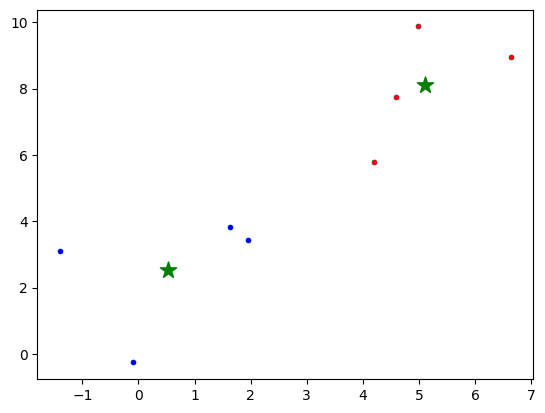

In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy

center_1=np.array([1,2])
center_2=np.array([5,8])
centers = [center_1, center_2]

data=[]

for i in range(8):
  data.append(np.random.randn(1,2) + centers[i % 2])

data=np.concatenate(data,axis=0)

plt.scatter(data[:,0], data[:,1], s=10)

k=2
n=data.shape[0]
c=data.shape[1]

mean=np.mean(data, axis=0)
std=np.std(data, axis=0)
centers=np.random.randn(k,c)*std+mean

centers_old = np.zeros(centers.shape)
centers_new = deepcopy(centers)

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

while error != 0:
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)
    clusters = np.argmin(distances, axis = 1)

    centers_old = deepcopy(centers_new)
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)

colors=['blue', 'red']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[clusters[i]])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)


print("Centroides (dimensiones: 2x2):")
print(centers_new)
print("\nAsignaciones de cluster (dimensiones: 8x1):")
print(clusters)


ACTIVIDAD 2

Estudiar una implementación de un algoritmo de clustering en alguna librería (por ejemplo, Scikit Learn).
Cargar el conjunto de datos que se ofrece a continuación y graficarlo.
Considerando 3 grupos, tomar solo el 20% de los datos para disminuir la cantidad, considerando los más representativos.
Calcular la distancia intracluster del conjunto total de los datos y del conjunto reducido.

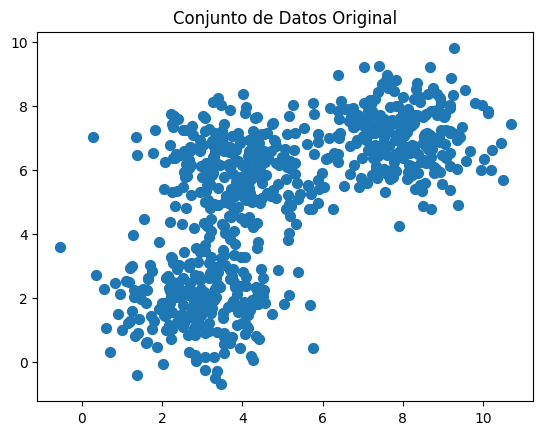

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


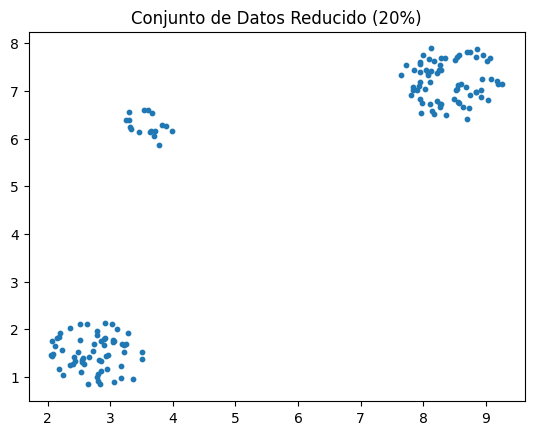

Distancia intracluster del conjunto total: 1430.210392452108
Distancia intracluster del conjunto reducido: 41.58357936528037


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [64]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

# Cargar el conjunto de datos (reemplazar con la ruta al archivo real)
data = np.loadtxt('DatosIACluster.txt')

# Graficar el conjunto de datos
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.title("Conjunto de Datos Original")
plt.show()

# Considerando 3 grupos, tomar solo el 20% de los datos
# para disminuir la cantidad, considerando los más representativos.

# Aplicar k-means con 3 clusters al conjunto de datos completo
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Obtener las etiquetas de cluster para cada punto de datos
labels = kmeans.labels_

# Calcular la puntuación de silueta para cada punto de datos
silhouette_scores = silhouette_samples(data, labels)

# Ordenar los puntos de datos por su puntuación de silueta
indices_ordenados = np.argsort(silhouette_scores)[::-1]

# Tomar el 20% de los datos con las puntuaciones de silueta más altas
num_datos_reducidos = int(0.2 * data.shape[0])
indices_reducidos = indices_ordenados[:num_datos_reducidos]
data_reducido = data[indices_reducidos]

# Graficar el conjunto de datos reducido
plt.scatter(data_reducido[:, 0], data_reducido[:, 1], s=10)
plt.title("Conjunto de Datos Reducido (20%)")
plt.show()

# Calcular la distancia intracluster del conjunto total de los datos
distancia_intracluster_total = kmeans.inertia_

# Calcular la distancia intracluster del conjunto reducido de los datos
kmeans_reducido = KMeans(n_clusters=3)
kmeans_reducido.fit(data_reducido)
distancia_intracluster_reducido = kmeans_reducido.inertia_

# Imprimir las distancias intracluster
print("Distancia intracluster del conjunto total:", distancia_intracluster_total)
print("Distancia intracluster del conjunto reducido:", distancia_intracluster_reducido)